In [14]:
import matplotlib.pyplot as plt

In [19]:
import numpy as np

In [23]:
import cv2


img = cv2.imread("annotations/annotations/trimaps/._Abyssinian_1.png")

In [33]:
cv2.imread("annotations/annotations/trimap/Abyssinian_201.png")

[ WARN:0@814.676] global loadsave.cpp:248 findDecoder imread_('annotations/annotations/trimap/Abyssinian_201.png'): can't open/read file: check file path/integrity


In [37]:
image_path = "images/images/Abyssinian_100.jpg"
mask_path = "annotations/annotations/trimaps/Abyssinian_100.png"

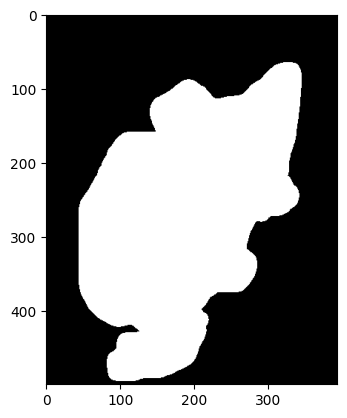

In [75]:
mask = cv2.imread(mask_path, 0)

# mask[mask==1] = 0
mask[mask==2] = 0
mask[mask>0] = 255

plt.imshow(mask, cmap='gray')

In [71]:
image = cv2.imread(image_path, 0)

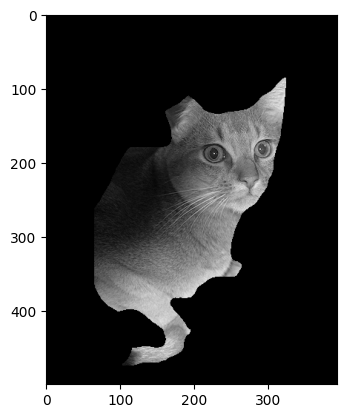

In [83]:
mask = cv2.imread(mask_path, 0)
image = cv2.imread(image_path, 0)

image[mask!=1] = 0
plt.imshow(image, cmap='gray')

In [27]:
import os
from typing import Iterable, Tuple

def get_image_and_mask(list_file: str, prefix:str=".") -> Iterable[Tuple[str, str]]:
    with open(list_file, "r") as f:
        # skip first 6 row
        for _ in range(6):
            next(f)
        for line in f:
            image_name = line.split(" ")[0]
            image_path = os.path.join(prefix, "images", "images", f"{image_name}.jpg")
            image_mask = os.path.join(prefix, "annotations", "annotations", "trimaps", f"{image_name}.png")
            yield image_path, image_mask



In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import tifffile as tiff
import cv2
import torch.nn as nn
import albumentations as A
import numpy as np
import os
import time
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [31]:
from typing import List, Callable, Any, Optional, Protocol
import matplotlib.pyplot as plt
from dataclasses import dataclass
import numpy as np

# Constant
DEFAULT_CMAP = "gray"

class Drawable(Protocol):
    def draw(self, ax: plt.Axes) -> None:
        ...


@dataclass
class DrawImage:
    data: np.array
    title: Optional[str] = None

    def draw(self, ax: plt.Axes) -> None:
        ax.imshow(self.data, cmap=DEFAULT_CMAP)
        if self.title:
            ax.set_title(self.title)
        ax.axis('off')

def show_multiple_plots(data: List[Drawable]) -> None:
    n = len(data)
    _, axes = plt.subplots(1, n, figsize=(20, 10), squeeze=False)
    for idx, ax in enumerate(axes[0]):
        item = data[idx]
        item.draw(ax)
    plt.tight_layout()
    plt.show()

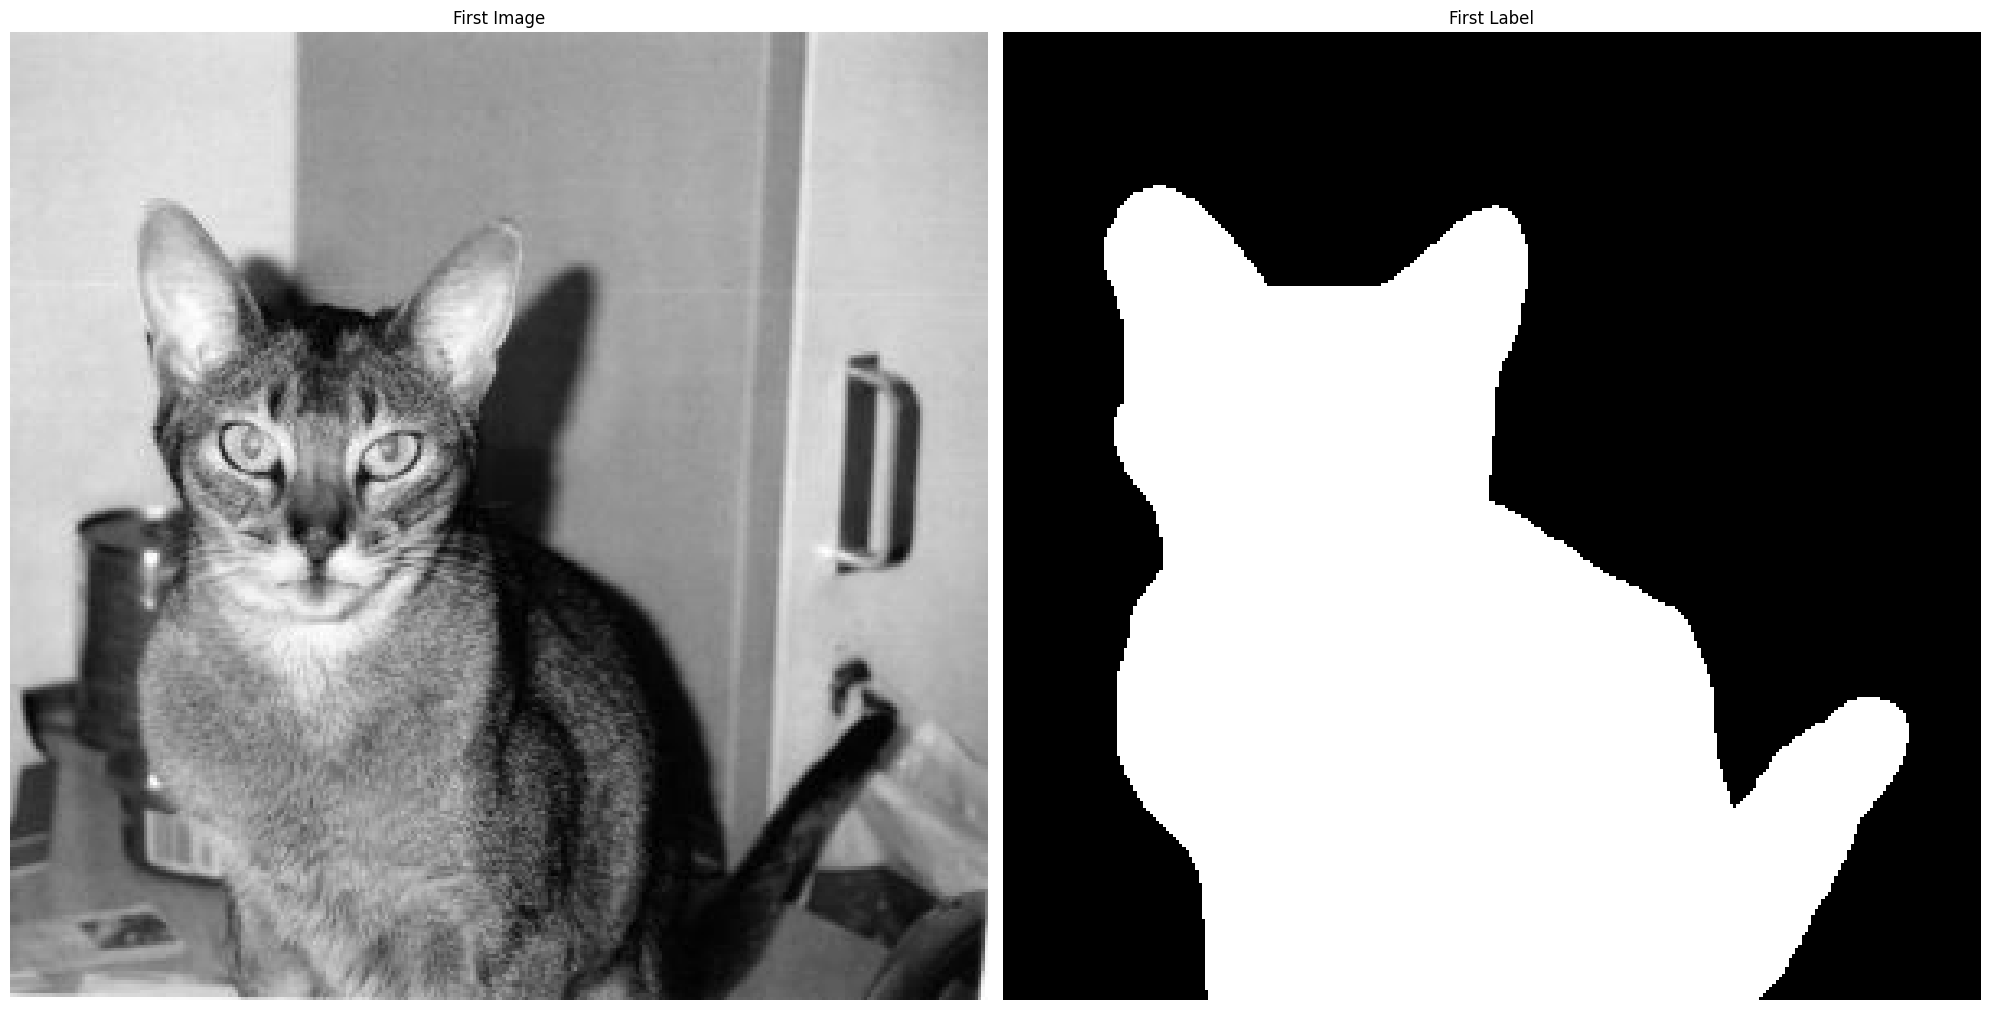

In [33]:
from typing import List, Callable, Any, Optional
from dataclasses import dataclass
import numpy as np

images_file, labels_file = tuple(zip(*list(get_image_and_mask("data/annotations/annotations/list.txt", prefix="./data"))))

first_image = cv2.imread(images_file[20], 0)
first_label = cv2.imread(labels_file[20], 0)
first_label[first_label==2] = 0
first_label[first_label>0] = 255


draw_items = [
    DrawImage(first_image, 'First Image'), 
    DrawImage(first_label, 'First Label')
]
show_multiple_plots(draw_items)